In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
method_names = {"attention": "Attentions", "alti": "ALTI"}

In [3]:
def collect_corrs(root_dir):
    # return a dict of dict of list. "finetuned" -> lang" -> { "notpretraining" : {"layer" : [], } , "pretraining" : {"layer" : []}}
    
    methods = ["attention", "alti"]
    langs = ["en", "it", "sp", "ge"]
    
    layers = 12
    
    collected_corrs = dict()
    
    for method in ["attention", "alti"]:
        collected_corrs[method] = dict()
        for finetuned in ["finetuned", "notfinetuned"]:
            collected_corrs[method][finetuned] = dict()                    
            for lang in langs:
                collected_corrs[method][finetuned][lang] = dict()
                collected_corrs[method][finetuned][lang]["notpretraining"] = dict()
                collected_corrs[method][finetuned][lang]["pretraining"] = dict()
                collected_corrs[method][finetuned][lang]["notpretraining_dur"] = dict()
                collected_corrs[method][finetuned][lang]["pretraining_dur"] = dict()
                collected_corrs[method][finetuned][lang]["notpretraining_prob_skip"] = dict()
                collected_corrs[method][finetuned][lang]["pretraining_prob_skip"] = dict()
                for l in range(layers):
                    collected_corrs[method][finetuned][lang]["notpretraining"][l] = list()
                    collected_corrs[method][finetuned][lang]["pretraining"][l] = list()
                    collected_corrs[method][finetuned][lang]["notpretraining_dur"][l] = list()
                    collected_corrs[method][finetuned][lang]["pretraining_dur"][l] = list()
                    collected_corrs[method][finetuned][lang]["notpretraining_prob_skip"][l] = list()
                    collected_corrs[method][finetuned][lang]["pretraining_prob_skip"][l] = list()

    depth = 2
    
    for subdir, dirs, files in os.walk(root_dir):
        if subdir[len(root_dir):].count(os.sep) == depth:
            for file_ in files:
                if file_ == "corrs_results.json":
                    with open(subdir + "/" + file_) as f:
                        d = json.load(f)
                                                       
                        method = subdir.split(os.sep)[-2]
                            
                        name_splitted = subdir.split("_")
                                                
                        if "dur" in name_splitted:
                            if len(name_splitted) == 3: # not finetuned
                                finetuned = "notfinetuned"
                            else:
                                finetuned = "finetuned"
                            pretrain = name_splitted[0].split(os.sep)[-1] + "_dur"
                        elif "skip" in name_splitted:
                            if len(name_splitted) == 4: # not finetuned
                                finetuned = "notfinetuned"
                            else:
                                finetuned = "finetuned"
                            pretrain = name_splitted[0].split(os.sep)[-1] + "_prob_skip"
                        else:
                            if len(name_splitted) == 2: # not finetuned
                                finetuned = "notfinetuned"
                            else:
                                finetuned = "finetuned"
                            pretrain = name_splitted[0].split(os.sep)[-1]

                        lang = name_splitted[-1]
                                                
                        for l in range(layers):
                            collected_corrs[method][finetuned][lang][pretrain][l] = list(d[method_names[method]][str(l)].values())
                
                
    return(collected_corrs)

In [4]:
collected_corrs = collect_corrs("corrs")

In [5]:
collected_corrs

{'attention': {'finetuned': {'en': {'notpretraining': {0: [-0.023328678458405222,
      0.014258631083319189,
      0.004062520933561636,
      0.0009711585327670313,
      0.008032595164545674,
      0.005483404499326128,
      -0.02108724325431456,
      0.023333743403250368],
     1: [-0.06733123474365796,
      0.0598166178548015,
      0.05479010340064949,
      0.05407897286479601,
      0.06396630675279913,
      0.06696890458290136,
      0.08241144146015354,
      0.05902664112713184],
     2: [-0.14422484084358927,
      0.11760687468805327,
      0.13733779330142395,
      0.14188236374843774,
      0.14463176276039205,
      0.15346732529137813,
      0.14164469881905306,
      0.14282793638799582],
     3: [-0.6179867750420085,
      0.573754660537462,
      0.6048135447002381,
      0.6008804893330996,
      0.6175369542818252,
      0.6170366432544344,
      0.5687563557938917,
      0.5479142825070765],
     4: [-0.7318247869431528,
      0.6729974303386584,
      0.707

## ATTENTIONS | Not Finetuned

### EN

In [5]:
en_pretraining = pd.DataFrame.from_dict(collected_corrs["attention"]["notfinetuned"]["en"]["pretraining"])

In [6]:
en_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.334246,0.200808,0.185498,0.030534,0.020099,-0.176694,-0.115760,-0.213094,-0.222898,-0.202630,-0.296051,0.501819
1,-0.352855,-0.201266,-0.190666,-0.045584,-0.032833,0.168817,0.120776,0.209932,0.231091,0.193599,0.275234,-0.485684
2,-0.346831,-0.211378,-0.211436,-0.061708,-0.045287,0.157600,0.110695,0.196355,0.217442,0.197586,0.293085,-0.492944
3,-0.348329,-0.219184,-0.204010,-0.055434,-0.046475,0.161801,0.112926,0.206774,0.225877,0.202593,0.298195,-0.497309
4,-0.337745,-0.213150,-0.208320,-0.047378,-0.035495,0.171375,0.114525,0.203711,0.217775,0.206888,0.301640,-0.502385
5,-0.342754,-0.212064,-0.199532,-0.044721,-0.031425,0.176157,0.120684,0.215663,0.226581,0.211707,0.307990,-0.498170
6,-0.314865,-0.206686,-0.204913,-0.051158,-0.040109,0.148936,0.103100,0.175593,0.193043,0.204915,0.299079,-0.467097
7,-0.303222,-0.178913,-0.156628,-0.024995,-0.008107,0.170272,0.109704,0.212442,0.203404,0.182537,0.278179,-0.445807


### IT

In [7]:
it_pretraining = pd.DataFrame.from_dict(collected_corrs["attention"]["notfinetuned"]["it"]["pretraining"])

In [8]:
it_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.170988,0.044768,0.165615,-0.025034,-0.033034,-0.217168,-0.162766,-0.177473,-0.197727,-0.046555,-0.278541,0.422304
1,-0.172763,-0.061013,-0.142965,0.043048,0.047479,0.220981,0.155822,0.199396,0.199994,0.041949,0.277228,-0.401947
2,-0.170672,-0.059593,-0.158724,0.017750,0.001645,0.191285,0.133056,0.166402,0.180764,0.042960,0.281444,-0.403718
3,-0.172876,-0.056536,-0.166161,0.030189,-0.002592,0.187623,0.130231,0.165802,0.184408,0.060640,0.298166,-0.411216
4,-0.173172,-0.053376,-0.174437,0.009919,-0.006850,0.188873,0.136515,0.158449,0.177167,0.037519,0.270366,-0.409448
5,-0.169481,-0.038877,-0.170353,0.026564,0.003247,0.183143,0.136349,0.156921,0.185775,0.061030,0.286473,-0.408460
6,-0.140220,-0.014947,-0.146543,0.021159,-0.024654,0.144116,0.091449,0.118698,0.148453,0.031950,0.255041,-0.354571
7,-0.141064,-0.025764,-0.164077,0.027842,0.014840,0.165210,0.125362,0.152057,0.178775,0.092519,0.261919,-0.349590


### SP

In [9]:
sp_pretraining = pd.DataFrame.from_dict(collected_corrs["attention"]["notfinetuned"]["sp"]["pretraining"])

In [10]:
sp_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.229459,-0.010738,0.055929,-0.133353,-0.249336,-0.418106,-0.264661,-0.310359,-0.298988,-0.149441,-0.281933,0.410309
1,-0.225721,-0.006938,-0.051655,0.133351,0.230330,0.389817,0.248773,0.301753,0.288826,0.148414,0.279131,-0.406684
2,-0.244500,-0.008020,-0.066558,0.114222,0.227575,0.389518,0.250296,0.301252,0.294598,0.154036,0.293793,-0.404061
3,-0.239180,0.003159,-0.067824,0.121856,0.237078,0.406125,0.260776,0.307210,0.296366,0.152747,0.297727,-0.407535
4,-0.236418,0.004988,-0.067885,0.120606,0.247177,0.408239,0.254290,0.307776,0.303422,0.156539,0.297432,-0.403322
5,-0.237527,0.010406,-0.063176,0.128854,0.249329,0.417518,0.272792,0.313132,0.305215,0.153947,0.301797,-0.410534
6,-0.212835,0.008250,-0.070943,0.121171,0.234151,0.356557,0.224255,0.275926,0.274945,0.140599,0.298829,-0.363801
7,-0.217717,0.015451,-0.048608,0.125429,0.244041,0.405327,0.263846,0.306791,0.284347,0.143098,0.271964,-0.394882


### GE

In [11]:
ge_pretraining = pd.DataFrame.from_dict(collected_corrs["attention"]["notfinetuned"]["ge"]["pretraining"])

In [12]:
ge_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.244301,0.089681,0.176443,0.104899,0.155559,0.014685,0.020579,-0.050732,-0.030318,0.045053,-0.200213,0.331293
1,-0.206683,-0.092580,-0.191391,-0.113504,-0.131268,-0.003902,-0.017805,0.053456,0.039785,-0.068574,0.161522,-0.286872
2,-0.241632,-0.094362,-0.200536,-0.131870,-0.178181,-0.048631,-0.050843,0.019343,0.005636,-0.049870,0.194870,-0.325956
3,-0.237360,-0.089466,-0.194887,-0.125065,-0.187778,-0.054238,-0.033438,0.014924,0.012219,-0.042929,0.204345,-0.319126
4,-0.244693,-0.090220,-0.186999,-0.118707,-0.170729,-0.053427,-0.053896,0.021755,0.004568,-0.044962,0.215255,-0.338340
5,-0.242656,-0.083779,-0.182707,-0.116260,-0.169989,-0.050507,-0.032110,0.021853,0.012079,-0.034742,0.219760,-0.332113
6,-0.244020,-0.090400,-0.175654,-0.110300,-0.166196,-0.069049,-0.075348,-0.012684,-0.009273,-0.036388,0.201507,-0.331145
7,-0.165439,-0.058774,-0.140993,-0.097972,-0.130100,-0.009355,0.017155,0.038628,0.045591,0.002412,0.171199,-0.247248


## ATTENTIONS | Fine-tuned

### EN

In [13]:
en_notpretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["en"]["notpretraining"])
en_pretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["en"]["pretraining"])

In [14]:
en_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.023329,-0.067331,-0.144225,-0.617987,-0.731825,-0.882022,-0.919135,-0.923486,-0.929572,-0.929131,-0.930560,-0.929977
1,0.014259,0.059817,0.117607,0.573755,0.672997,0.826289,0.860983,0.862121,0.868303,0.869740,0.871523,0.871193
2,0.004063,0.054790,0.137338,0.604814,0.707176,0.864464,0.902825,0.905127,0.910902,0.912650,0.914543,0.914568
3,0.000971,0.054079,0.141882,0.600880,0.713651,0.871044,0.905826,0.915018,0.917847,0.920548,0.920763,0.921068
4,0.008033,0.063966,0.144632,0.617537,0.732545,0.886251,0.927807,0.931192,0.937425,0.938186,0.940572,0.940792
5,0.005483,0.066969,0.153467,0.617037,0.734010,0.883359,0.920802,0.928918,0.931561,0.933214,0.934233,0.934214
6,-0.021087,0.082411,0.141645,0.568756,0.670823,0.818848,0.857619,0.858995,0.863681,0.865303,0.867046,0.868358
7,0.023334,0.059027,0.142828,0.547914,0.654041,0.779154,0.796505,0.809341,0.806267,0.809079,0.807806,0.807750


In [15]:
en_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.341421,0.163970,-0.279507,-0.530695,-0.081501,0.228808,-0.346218,-0.478790,-0.317663,0.807702,-0.957741,-0.502335
1,-0.358296,-0.166466,0.274049,0.510445,0.072088,-0.219734,0.328970,0.422828,0.241010,-0.750514,0.899962,0.420731
2,-0.353080,-0.177687,0.264067,0.512492,0.061922,-0.240048,0.330590,0.459104,0.288091,-0.784045,0.940685,0.484291
3,-0.354546,-0.184700,0.255595,0.517880,0.065778,-0.240973,0.329096,0.466773,0.296536,-0.796762,0.952717,0.509379
4,-0.345317,-0.178995,0.263581,0.529468,0.070430,-0.239624,0.340573,0.478438,0.315797,-0.813106,0.964593,0.514358
5,-0.349834,-0.176113,0.263582,0.528781,0.075309,-0.236921,0.333864,0.474778,0.312857,-0.807021,0.961407,0.520426
6,-0.321085,-0.181050,0.238456,0.472733,0.052780,-0.242036,0.287114,0.480911,0.323317,-0.738138,0.882844,0.533443
7,-0.310386,-0.142477,0.249680,0.471744,0.092252,-0.203043,0.286134,0.400786,0.240882,-0.701008,0.835386,0.431375


### IT

In [16]:
it_notpretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["it"]["notpretraining"])
it_pretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["it"]["pretraining"])

In [17]:
it_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000887,0.054701,0.097956,0.485122,-0.546603,-0.042611,0.094955,0.488629,-0.839867,-0.835639,-0.870280,-0.873099
1,-0.003828,-0.067334,-0.074518,-0.452872,0.486303,0.001810,-0.129033,-0.549128,0.730776,0.772757,0.756717,0.768073
2,0.003963,-0.058031,-0.093531,-0.483790,0.539840,0.072091,-0.071074,-0.429230,0.845384,0.794866,0.871686,0.868459
3,0.017221,-0.052327,-0.079037,-0.469205,0.545061,0.083460,-0.066132,-0.402688,0.860559,0.805419,0.888502,0.881281
4,0.008758,-0.048365,-0.100881,-0.493667,0.558402,0.094094,-0.052597,-0.396738,0.891694,0.830575,0.918496,0.912718
5,0.025858,-0.043263,-0.095511,-0.477185,0.549422,0.095792,-0.051542,-0.377964,0.885927,0.819636,0.912247,0.903702
6,0.013560,-0.032783,-0.091557,-0.437269,0.493198,0.122820,0.016866,-0.232300,0.825689,0.732286,0.842359,0.831177
7,0.012558,-0.026241,-0.056238,-0.374585,0.439451,0.037610,-0.091232,-0.339461,0.689544,0.663426,0.715689,0.712229


In [18]:
it_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.168091,0.431724,0.055259,-0.295652,0.053827,0.323440,-0.382574,0.386312,-0.304686,-0.145827,-0.922250,0.042540
1,-0.169692,-0.423232,-0.050358,0.263275,-0.048113,-0.246966,0.428139,-0.356907,0.211711,0.249632,0.793825,0.096564
2,-0.168308,-0.419989,-0.055551,0.289568,-0.052610,-0.328690,0.350037,-0.364714,0.276881,0.098888,0.901694,-0.091097
3,-0.170400,-0.417702,-0.055210,0.294941,-0.055708,-0.335754,0.340557,-0.371927,0.286149,0.075565,0.916294,-0.115141
4,-0.171035,-0.420940,-0.057265,0.296695,-0.055087,-0.350341,0.334062,-0.368927,0.312027,0.056204,0.951858,-0.146164
5,-0.167131,-0.406790,-0.053664,0.300112,-0.067257,-0.344846,0.327708,-0.376388,0.305659,0.051844,0.944909,-0.145983
6,-0.138594,-0.330464,-0.016964,0.297144,-0.041573,-0.331218,0.215443,-0.263205,0.274030,-0.108795,0.851204,-0.288029
7,-0.141074,-0.346831,-0.062292,0.236842,-0.070044,-0.264929,0.282168,-0.319311,0.261522,0.087475,0.741228,-0.063585


### SP

In [19]:
sp_notpretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["sp"]["notpretraining"])
sp_pretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["sp"]["pretraining"])

In [20]:
sp_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.087313,-0.296714,-0.180931,-0.537132,-0.775564,-0.745958,-0.732442,-0.051304,-0.899289,-0.904407,-0.905160,-0.905385
1,0.075392,0.282643,0.157201,0.496905,0.720591,0.688930,0.666283,-0.006074,0.836968,0.845820,0.847239,0.846685
2,0.067404,0.289463,0.177368,0.529206,0.761731,0.738196,0.719304,0.066957,0.886207,0.894736,0.898070,0.898032
3,0.070975,0.296005,0.178940,0.538034,0.776507,0.748218,0.732269,0.077437,0.900653,0.911146,0.911905,0.911436
4,0.074140,0.298155,0.187049,0.547233,0.784599,0.758530,0.747865,0.094118,0.912963,0.917639,0.920817,0.921288
5,0.071238,0.306143,0.179965,0.551342,0.788563,0.759337,0.749913,0.092690,0.910917,0.920355,0.920761,0.920437
6,0.024682,0.263081,0.193439,0.530359,0.725501,0.719190,0.738770,0.259748,0.815734,0.820523,0.823501,0.823583
7,0.081103,0.290912,0.159020,0.498650,0.706261,0.673203,0.668143,0.053513,0.806693,0.812223,0.810685,0.809953


In [21]:
sp_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.212150,0.052264,-0.159696,-0.327313,-0.365805,-0.614401,-0.764770,-0.750351,-0.277137,-0.482990,-0.931978,-0.151876
1,-0.210805,-0.072116,0.158663,0.317668,0.333114,0.567868,0.711067,0.698839,0.223962,0.419152,0.878774,0.149432
2,-0.229166,-0.085141,0.156699,0.308660,0.341663,0.569311,0.728019,0.715731,0.262634,0.458946,0.904981,0.154763
3,-0.222983,-0.080781,0.158866,0.308155,0.350417,0.580650,0.737078,0.730878,0.281532,0.483293,0.922170,0.167349
4,-0.220041,-0.067279,0.153265,0.320383,0.359402,0.593471,0.756618,0.744343,0.278318,0.482184,0.926697,0.154781
5,-0.220593,-0.068970,0.157992,0.319652,0.359556,0.596083,0.750662,0.746763,0.296811,0.498902,0.931806,0.166561
6,-0.197763,-0.080714,0.124929,0.285088,0.288136,0.476812,0.628310,0.649139,0.286487,0.458022,0.806075,0.182286
7,-0.201591,-0.064741,0.160265,0.293174,0.342047,0.555597,0.670501,0.674857,0.264459,0.441414,0.836933,0.141123


### GE

In [22]:
ge_notpretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["ge"]["notpretraining"])
ge_pretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["ge"]["pretraining"])

In [23]:
ge_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.047747,0.141707,0.062787,-0.568256,-0.809579,-0.838321,-0.694919,-0.141170,-0.888593,-0.888920,-0.893117,-0.890191
1,0.053582,-0.120384,-0.074425,0.460184,0.679343,0.705477,0.541833,0.010028,0.748990,0.749178,0.750287,0.761009
2,0.040011,-0.128081,-0.065487,0.565287,0.800779,0.831832,0.688877,0.198223,0.877348,0.876551,0.884089,0.875780
3,0.033338,-0.112796,-0.059975,0.579124,0.811219,0.846306,0.701211,0.213424,0.891359,0.888225,0.894915,0.889373
4,0.029380,-0.120986,-0.054259,0.605326,0.837761,0.876684,0.746986,0.231687,0.930127,0.928779,0.936189,0.927745
5,0.030440,-0.117219,-0.049771,0.598948,0.826601,0.863280,0.730529,0.225216,0.915137,0.913312,0.919564,0.914199
6,0.006169,-0.101400,-0.035001,0.569240,0.783867,0.820541,0.745843,0.337066,0.860889,0.860890,0.868638,0.861776
7,0.046676,-0.071701,-0.051439,0.421342,0.576633,0.598556,0.492521,0.081799,0.640472,0.641108,0.640881,0.649926


In [24]:
ge_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.241682,-0.148882,0.040535,0.010287,-0.459982,0.263659,-0.491026,0.789949,0.653035,-0.228217,-0.798739,-0.200616
1,-0.204415,0.121188,-0.060554,0.021075,0.397178,-0.181886,0.473953,-0.699545,-0.532438,0.219688,0.750392,0.165811
2,-0.237388,0.140484,-0.053916,-0.023299,0.399768,-0.282372,0.444354,-0.770935,-0.640289,0.179614,0.738662,0.138849
3,-0.234934,0.152541,-0.059288,-0.032569,0.410397,-0.270321,0.457368,-0.769150,-0.644425,0.220179,0.757826,0.169584
4,-0.241688,0.148604,-0.037298,-0.028094,0.435769,-0.311923,0.464027,-0.800096,-0.684512,0.197951,0.780986,0.177009
5,-0.240141,0.159550,-0.048738,-0.029115,0.434215,-0.295423,0.464344,-0.790580,-0.673994,0.223254,0.780764,0.189713
6,-0.240246,0.130675,-0.037116,-0.069806,0.378888,-0.329557,0.355385,-0.714168,-0.632763,0.218584,0.700893,0.265040
7,-0.167353,0.129196,-0.051539,-0.004336,0.373268,-0.174516,0.384853,-0.584422,-0.480753,0.216254,0.624799,0.177132


### Plot mean curve for english dataset

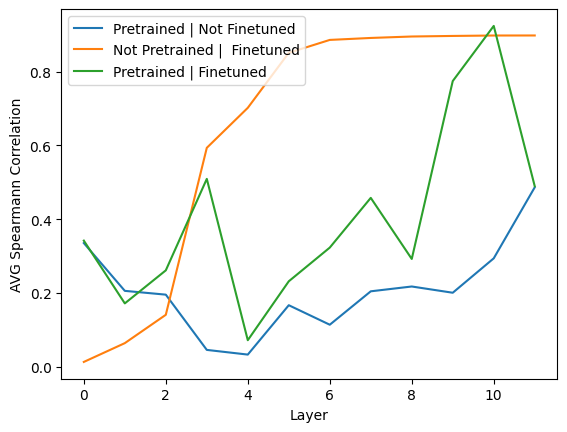

In [25]:
plt.plot(np.mean(np.abs(en_pretraining.values), axis=0), label = "Pretrained | Not Finetuned")
plt.plot(np.mean(np.abs(en_notpretraining_fine.values), axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(np.mean(np.abs(en_pretraining_fine.values), axis=0), label = "Pretrained | Finetuned")
plt.legend()
plt.xlabel("Layer")
plt.ylabel("AVG Spearmann Correlation")
plt.show()

## ALTI | Not-finetuned

### EN

In [26]:
en_pretraining = pd.DataFrame.from_dict(collected_corrs["alti"]["notfinetuned"]["en"]["pretraining"])

In [27]:
en_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.179155,0.120188,0.028023,-0.117472,-0.214571,-0.323667,-0.359773,-0.378170,-0.380867,-0.403361,-0.410051,-0.382421
1,-0.193286,-0.135109,-0.044409,0.095482,0.189149,0.300682,0.338572,0.356082,0.358912,0.376894,0.383468,0.354139
2,-0.193029,-0.135252,-0.048000,0.091362,0.183797,0.293382,0.329966,0.347356,0.350365,0.368474,0.376051,0.348430
3,-0.190634,-0.135580,-0.048103,0.090686,0.183764,0.293938,0.328255,0.346895,0.350986,0.368606,0.375531,0.348135
4,-0.180857,-0.123486,-0.036620,0.106521,0.198093,0.305949,0.341888,0.360783,0.364131,0.384298,0.393105,0.365641
5,-0.186795,-0.129321,-0.040529,0.101155,0.196497,0.307092,0.341230,0.360355,0.363839,0.383093,0.390083,0.363260
6,-0.181187,-0.125409,-0.046607,0.082621,0.167754,0.263227,0.295987,0.311878,0.313567,0.331775,0.340599,0.314475
7,-0.174013,-0.118032,-0.037384,0.094425,0.182073,0.285529,0.314560,0.333189,0.335565,0.352549,0.356898,0.332339


## IT

In [28]:
it_pretraining = pd.DataFrame.from_dict(collected_corrs["alti"]["notfinetuned"]["it"]["pretraining"])

In [29]:
it_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.064352,-0.027531,-0.079150,-0.151279,-0.192733,-0.249877,-0.276001,-0.285134,-0.276074,-0.281686,-0.288908,-0.245609
1,0.059865,0.026962,0.083368,0.151644,0.189887,0.247314,0.270148,0.279569,0.271236,0.276970,0.282252,0.239644
2,0.055135,0.015095,0.064759,0.133756,0.168752,0.217724,0.238943,0.249238,0.242081,0.249666,0.257141,0.214227
3,0.048550,0.013056,0.065579,0.136073,0.170789,0.219189,0.242389,0.252516,0.242557,0.252949,0.259575,0.212408
4,0.052490,0.011657,0.057207,0.129834,0.166990,0.217096,0.240791,0.251067,0.243952,0.251744,0.260799,0.216045
5,0.047167,0.016107,0.065848,0.138955,0.174715,0.223882,0.248734,0.257921,0.248260,0.259175,0.267039,0.220099
6,0.049242,0.022060,0.064003,0.130872,0.157113,0.192853,0.210314,0.216783,0.210952,0.219160,0.227357,0.189173
7,0.040929,0.015862,0.055060,0.115622,0.146689,0.189403,0.208685,0.217189,0.207893,0.219269,0.224702,0.181725


### SP

In [30]:
sp_pretraining = pd.DataFrame.from_dict(collected_corrs["alti"]["notfinetuned"]["sp"]["pretraining"])

In [31]:
sp_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.117957,-0.163653,-0.255381,-0.338547,-0.390466,-0.460821,-0.486413,-0.493415,-0.487659,-0.493665,-0.495089,-0.477429
1,0.101796,0.142877,0.236667,0.317195,0.368184,0.435460,0.459766,0.465737,0.458095,0.465885,0.467964,0.450708
2,0.098854,0.143666,0.236480,0.316733,0.367736,0.439306,0.463728,0.470952,0.464360,0.472115,0.472708,0.455419
3,0.109049,0.153802,0.242006,0.321915,0.373056,0.446190,0.471452,0.479419,0.473163,0.480354,0.480755,0.464316
4,0.113814,0.158399,0.248951,0.330875,0.382573,0.455341,0.478790,0.487350,0.480813,0.487531,0.487494,0.470061
5,0.115497,0.161469,0.252474,0.334450,0.384885,0.459611,0.484174,0.492137,0.486006,0.491536,0.490962,0.475246
6,0.103640,0.139522,0.215224,0.286625,0.331874,0.399068,0.420558,0.427045,0.420376,0.426835,0.426269,0.411030
7,0.097292,0.135800,0.221455,0.297361,0.341138,0.412757,0.435489,0.442943,0.437986,0.442192,0.443330,0.427206


### GE

In [32]:
ge_pretraining = pd.DataFrame.from_dict(collected_corrs["alti"]["notfinetuned"]["ge"]["pretraining"])

In [33]:
ge_pretraining

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.025333,0.029125,-0.022083,-0.071361,-0.082505,-0.126857,-0.137116,-0.143028,-0.136352,-0.144429,-0.143677,-0.117560
1,-0.024791,-0.033012,0.000807,0.046609,0.060777,0.108545,0.117607,0.125363,0.119656,0.121097,0.119066,0.097918
2,-0.050194,-0.054764,-0.010643,0.033441,0.045694,0.088029,0.100410,0.106337,0.101805,0.107943,0.106474,0.081041
3,-0.043992,-0.052435,-0.010318,0.035437,0.046136,0.091081,0.105156,0.109037,0.103978,0.110628,0.110931,0.086682
4,-0.043240,-0.045603,0.006293,0.052344,0.062876,0.102536,0.112858,0.118330,0.111736,0.120201,0.120983,0.093798
5,-0.049117,-0.056288,-0.005140,0.042754,0.053038,0.099177,0.112416,0.117771,0.109947,0.120141,0.120998,0.093974
6,-0.064068,-0.067611,-0.019056,0.023619,0.032220,0.070973,0.081108,0.085115,0.078790,0.088660,0.089319,0.062037
7,-0.019854,-0.032069,-0.001316,0.030738,0.037530,0.083194,0.094077,0.095943,0.091628,0.103494,0.101908,0.082443


## ALTI | Finetuned

### EN

In [34]:
en_notpretraining_fine = pd.DataFrame.from_dict(collected_corrs["alti"]["finetuned"]["en"]["notpretraining"])
en_pretraining_fine = pd.DataFrame.from_dict(collected_corrs["alti"]["finetuned"]["en"]["pretraining"])

In [35]:
en_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.031126,-0.090440,-0.206479,-0.323610,-0.494774,-0.705607,-0.809164,-0.870617,-0.895910,-0.903087,-0.909072,-0.914239
1,-0.038053,0.092917,0.205630,0.324121,0.483302,0.672085,0.770670,0.825561,0.848065,0.855217,0.859181,0.863107
2,-0.030439,0.079890,0.191580,0.309629,0.477201,0.680515,0.785313,0.845664,0.872154,0.878670,0.883530,0.889611
3,-0.027430,0.082750,0.200585,0.312678,0.481849,0.691515,0.794963,0.853513,0.881160,0.888594,0.892741,0.898307
4,-0.033998,0.082090,0.197043,0.312554,0.481579,0.696784,0.802979,0.866905,0.894561,0.901454,0.907227,0.913758
5,-0.025482,0.084791,0.204988,0.314041,0.484887,0.701020,0.805681,0.865887,0.893746,0.900990,0.905696,0.911640
6,-0.046051,0.081986,0.181577,0.286557,0.436872,0.635587,0.737882,0.798651,0.825969,0.831749,0.836464,0.843347
7,-0.015326,0.079492,0.189288,0.287251,0.441765,0.633630,0.723093,0.769494,0.789692,0.796406,0.798634,0.802481


In [36]:
en_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.236783,0.264834,0.074757,-0.384384,-0.444814,-0.455257,-0.441418,-0.462401,-0.439250,-0.431084,-0.449286,-0.457169
1,-0.246503,-0.270848,-0.089120,0.349348,0.407671,0.416762,0.405234,0.423285,0.401450,0.394246,0.410082,0.416919
2,-0.251032,-0.277904,-0.092774,0.360442,0.418415,0.428793,0.417555,0.437795,0.415517,0.407132,0.425986,0.433018
3,-0.250507,-0.280425,-0.093670,0.363002,0.419771,0.430586,0.418411,0.438820,0.416592,0.409024,0.427385,0.434126
4,-0.240112,-0.268470,-0.081559,0.382108,0.441128,0.451874,0.438745,0.459679,0.436899,0.428636,0.448213,0.455394
5,-0.245479,-0.276757,-0.085333,0.380298,0.440781,0.451882,0.438724,0.459685,0.436981,0.429163,0.447485,0.454694
6,-0.235647,-0.258820,-0.088794,0.344848,0.402408,0.410699,0.400186,0.422716,0.402028,0.395161,0.414989,0.422275
7,-0.221447,-0.249511,-0.072138,0.338576,0.399467,0.410036,0.397554,0.414216,0.395644,0.389533,0.402333,0.407700


### IT

In [37]:
it_notpretraining_fine = pd.DataFrame.from_dict(collected_corrs["alti"]["finetuned"]["it"]["notpretraining"])
it_pretraining_fine = pd.DataFrame.from_dict(collected_corrs["alti"]["finetuned"]["it"]["pretraining"])

In [38]:
it_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.039612,0.095445,0.123724,0.232854,0.108357,0.115188,0.174614,0.274146,-0.060655,-0.260096,-0.547516,-0.697539
1,-0.026452,-0.086874,-0.096326,-0.195619,-0.077350,-0.075146,-0.122211,-0.228338,0.073234,0.277533,0.527814,0.666192
2,-0.047438,-0.108056,-0.127289,-0.244957,-0.122836,-0.127761,-0.191121,-0.284554,0.045538,0.226393,0.512645,0.658217
3,-0.051952,-0.116554,-0.131032,-0.239341,-0.117114,-0.122901,-0.191635,-0.283476,0.052629,0.231783,0.521450,0.665234
4,-0.056665,-0.115294,-0.138076,-0.260213,-0.133531,-0.138634,-0.208807,-0.295846,0.049955,0.228609,0.528534,0.676659
5,-0.047829,-0.111506,-0.130340,-0.240537,-0.120257,-0.126345,-0.198060,-0.286289,0.057390,0.235621,0.531172,0.676059
6,-0.054385,-0.105318,-0.130763,-0.243130,-0.139607,-0.145557,-0.212854,-0.273805,0.044419,0.172578,0.453981,0.586643
7,-0.056771,-0.106603,-0.132017,-0.206207,-0.103914,-0.108401,-0.162453,-0.239519,0.035564,0.193851,0.434022,0.552262


In [39]:
it_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.070251,0.161639,0.073488,-0.145302,-0.203881,-0.255575,-0.240419,-0.158461,-0.102391,-0.069820,-0.065563,-0.042104
1,0.068233,-0.157103,-0.067525,0.126948,0.183914,0.230276,0.217023,0.138301,0.091425,0.064662,0.060997,0.039759
2,0.060673,-0.164004,-0.075147,0.136010,0.192964,0.240579,0.227008,0.150010,0.095284,0.064192,0.059983,0.036264
3,0.051518,-0.166511,-0.076495,0.136701,0.192725,0.240644,0.224903,0.150063,0.094921,0.062807,0.057915,0.033768
4,0.056819,-0.168306,-0.081353,0.140782,0.197406,0.247424,0.232452,0.155411,0.098556,0.064356,0.060042,0.035564
5,0.051211,-0.163882,-0.074619,0.141998,0.196456,0.247444,0.230398,0.152813,0.097483,0.063637,0.058658,0.034316
6,0.049456,-0.124088,-0.042438,0.154154,0.201037,0.238840,0.226426,0.173921,0.122445,0.091205,0.087108,0.063687
7,0.041049,-0.137094,-0.067325,0.109598,0.151962,0.195239,0.182053,0.118201,0.074373,0.050464,0.046021,0.026920


### SP

In [40]:
sp_notpretraining_fine = pd.DataFrame.from_dict(collected_corrs["alti"]["finetuned"]["sp"]["notpretraining"])
sp_pretraining_fine = pd.DataFrame.from_dict(collected_corrs["alti"]["finetuned"]["sp"]["pretraining"])

In [41]:
sp_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.009051,0.172963,0.045852,0.195568,0.283216,0.478524,0.183572,0.610467,0.299224,-0.172790,-0.525825,-0.731161
1,-0.004788,-0.147844,-0.025387,-0.173912,-0.241866,-0.428384,-0.147324,-0.577086,-0.281482,0.171324,0.507878,0.701275
2,-0.003350,-0.168844,-0.040303,-0.198705,-0.281954,-0.478061,-0.192729,-0.601448,-0.301117,0.152994,0.496253,0.699311
3,-0.009325,-0.172739,-0.032549,-0.202915,-0.289003,-0.487742,-0.199896,-0.607531,-0.304448,0.150026,0.497571,0.704267
4,-0.002688,-0.176474,-0.044304,-0.197667,-0.295698,-0.498541,-0.204940,-0.612539,-0.306657,0.158295,0.508407,0.712738
5,-0.003704,-0.169817,-0.032938,-0.199656,-0.295921,-0.492672,-0.203848,-0.608175,-0.301650,0.156553,0.506489,0.714172
6,0.002332,-0.168131,-0.049224,-0.191764,-0.301142,-0.489410,-0.221821,-0.502580,-0.205317,0.198011,0.487079,0.647661
7,-0.000955,-0.147854,-0.033412,-0.180255,-0.259841,-0.428937,-0.173488,-0.545433,-0.264659,0.151859,0.469623,0.656648


In [42]:
sp_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.081868,-0.002343,-0.203291,-0.379035,-0.432200,-0.546115,-0.548288,-0.575568,-0.561279,-0.555899,-0.580330,-0.571516
1,0.068573,-0.009784,0.186931,0.352994,0.403217,0.506366,0.507457,0.533654,0.519757,0.514542,0.539617,0.530566
2,0.063614,-0.016860,0.182849,0.351675,0.405544,0.517590,0.519609,0.546881,0.533197,0.527574,0.552195,0.543496
3,0.073303,-0.006769,0.189446,0.361617,0.419389,0.533254,0.534383,0.562101,0.548410,0.542984,0.568008,0.558835
4,0.077244,-0.003258,0.199347,0.371822,0.425358,0.539374,0.542161,0.570227,0.555950,0.550521,0.573883,0.565770
5,0.079671,-0.000029,0.199095,0.373835,0.430081,0.546421,0.548007,0.576799,0.563112,0.557412,0.581662,0.572795
6,0.072069,-0.009599,0.166343,0.314240,0.360970,0.468733,0.471348,0.501894,0.491265,0.487053,0.509416,0.502806
7,0.065452,-0.007969,0.173211,0.337110,0.393076,0.495891,0.498825,0.524761,0.512629,0.507582,0.529377,0.522006


### GE

In [43]:
ge_notpretraining_fine = pd.DataFrame.from_dict(collected_corrs["alti"]["finetuned"]["ge"]["notpretraining"])
ge_pretraining_fine = pd.DataFrame.from_dict(collected_corrs["alti"]["finetuned"]["ge"]["pretraining"])

In [44]:
ge_notpretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.040996,0.065686,0.041386,-0.091998,-0.324943,-0.516240,-0.631020,-0.671681,-0.784578,-0.813249,-0.837759,-0.852287
1,0.059507,-0.041173,-0.022556,0.089447,0.301783,0.464419,0.560971,0.599176,0.688369,0.720235,0.741887,0.753012
2,0.067380,-0.039921,-0.036263,0.093388,0.331162,0.511664,0.622940,0.667147,0.768733,0.794038,0.818931,0.829898
3,0.047814,-0.030151,-0.026161,0.102360,0.343421,0.528604,0.637743,0.678278,0.781643,0.806863,0.831461,0.842013
4,0.057124,-0.045952,-0.024094,0.109934,0.349059,0.540950,0.658220,0.699415,0.810849,0.834666,0.860379,0.873556
5,0.036992,-0.028270,-0.015838,0.119562,0.354581,0.544218,0.655234,0.693282,0.802309,0.826175,0.851850,0.863409
6,0.047546,-0.005492,-0.006633,0.113466,0.336177,0.508115,0.621077,0.656422,0.757074,0.775732,0.801259,0.808191
7,0.004398,-0.026091,-0.000853,0.114115,0.287439,0.423650,0.489844,0.518742,0.591364,0.609896,0.625848,0.632002


In [45]:
ge_pretraining_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.061402,0.049486,-0.063908,-0.142431,-0.269326,-0.255542,-0.248131,-0.083823,-0.032548,-0.026224,-0.019900,-0.014602
1,-0.057941,-0.052119,0.042467,0.121812,0.225703,0.219048,0.218237,0.081097,0.040214,0.033901,0.029274,0.024818
2,-0.082963,-0.073734,0.034772,0.105732,0.214968,0.202631,0.192926,0.036624,-0.011381,-0.017802,-0.023912,-0.029137
3,-0.075932,-0.066593,0.035372,0.105922,0.222771,0.211969,0.202278,0.044112,-0.004015,-0.010435,-0.016913,-0.022971
4,-0.075996,-0.064164,0.049990,0.120130,0.240726,0.225101,0.215006,0.049851,-0.003717,-0.010149,-0.016763,-0.022117
5,-0.081831,-0.070335,0.035987,0.108312,0.235391,0.221366,0.210956,0.045940,-0.004764,-0.010804,-0.017333,-0.023516
6,-0.098507,-0.089115,0.015652,0.069041,0.186998,0.168687,0.159991,0.013765,-0.037078,-0.043010,-0.049231,-0.053088
7,-0.050764,-0.028841,0.032983,0.089353,0.196098,0.190019,0.184638,0.058358,0.019946,0.016806,0.011612,0.005826


### Plot mean curve for english dataset

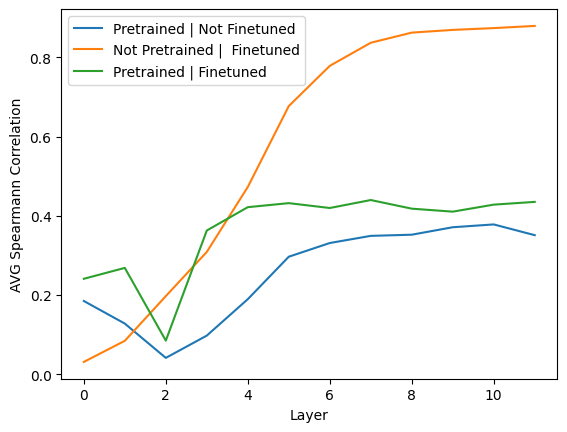

In [47]:
plt.plot(np.mean(np.abs(en_pretraining.values), axis=0), label = "Pretrained | Not Finetuned")
plt.plot(np.mean(np.abs(en_notpretraining_fine.values), axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(np.mean(np.abs(en_pretraining_fine.values), axis=0), label = "Pretrained | Finetuned")
plt.legend()
plt.xlabel("Layer")
plt.ylabel("AVG Spearmann Correlation")
plt.show()

# DUR

## Attention

In [12]:
en_pretraining = pd.DataFrame.from_dict(collected_corrs["attention"]["notfinetuned"]["en"]["pretraining_dur"])
en_notpretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["en"]["notpretraining_dur"])
en_pretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["en"]["pretraining_dur"])

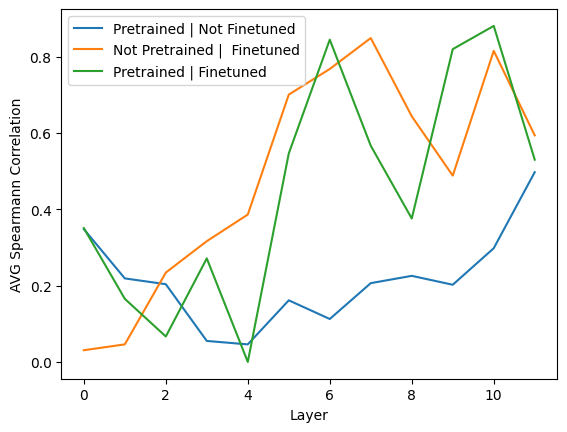

In [13]:
plt.plot(np.mean(np.abs(en_pretraining.values), axis=0), label = "Pretrained | Not Finetuned")
plt.plot(np.mean(np.abs(en_notpretraining_fine.values), axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(np.mean(np.abs(en_pretraining_fine.values), axis=0), label = "Pretrained | Finetuned")
plt.legend()
plt.xlabel("Layer")
plt.ylabel("AVG Spearmann Correlation")
plt.show()

## ALTI

# PROB_SKIP

## Attention

In [14]:
en_pretraining = pd.DataFrame.from_dict(collected_corrs["attention"]["notfinetuned"]["en"]["pretraining_prob_skip"])
en_notpretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["en"]["notpretraining_prob_skip"])
en_pretraining_fine = pd.DataFrame.from_dict(collected_corrs["attention"]["finetuned"]["en"]["pretraining_prob_skip"])

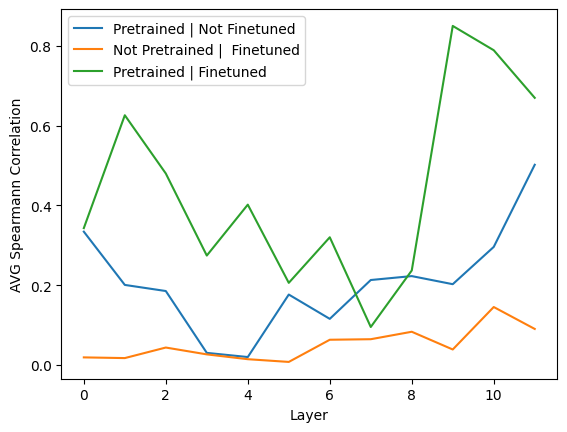

In [15]:
plt.plot(np.mean(np.abs(en_pretraining.values), axis=0), label = "Pretrained | Not Finetuned")
plt.plot(np.mean(np.abs(en_notpretraining_fine.values), axis=0), label = "Not Pretrained |  Finetuned")
plt.plot(np.mean(np.abs(en_pretraining_fine.values), axis=0), label = "Pretrained | Finetuned")
plt.legend()
plt.xlabel("Layer")
plt.ylabel("AVG Spearmann Correlation")
plt.show()

## ALTI